# First Model

In [141]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import pickle

In [2]:
processed_data_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/processed/'
ESC50_MFCC_train=np.loadtxt(processed_data_path+'ESC50_MFCC_train.csv',delimiter=',')
firearm_MFCC_train=np.loadtxt(processed_data_path+'firearm_MFCC_train.csv',delimiter=',')

In [3]:
print(ESC50_MFCC_train.shape)
print(firearm_MFCC_train.shape)

(500, 4320)
(32, 4320)


In [8]:
pd.DataFrame(firearm_MFCC_train)

,0,1,2,3,4,5,6,7,8,9,...,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319
0,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,-8.525504,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.837321,2.073349,2.100537,1.984788,1.894969,1.827690,1.662386,1.498367,1.225679,1.005552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5.247195,3.574073,0.504990,-3.743280,2.201334,3.612844,1.286490,-2.669500,-1.282075,1.511820,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.174269,0.647191,0.766702,0.759658,0.738129,0.747698,0.676347,0.443593,0.070871,-0.290249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-3.856402,-1.963995,-1.383199,-0.098023,0.695652,0.666750,0.329034,0.350551,0.581622,-0.088078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-7.311860,-7.311860,-7.311860,-7.311860,-7.133564,-6.892543,-6.775565,-1.848250,0.871258,1.298081,...,0.075009,0.007201,0.001994,0.013079,0.020462,0.046097,0.030666,0.053329,0.104269,0.116058
6,3.179577,3.212592,3.009134,2.739997,2.534088,2.440984,2.156708,1.673056,1.432984,1.088092,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-5.435186,-5.237531,-1.338151,-0.143638,0.364332,0.545491,0.638833,0.728617,0.640354,0.392823,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.931199,0.978672,1.512704,1.225576,1.291562,1.318038,1.095150,0.743149,0.462280,0.170933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,-9.383957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Next, I will merge the two into one and then also instantiate an output vector. 

In [5]:
X_train=np.concatenate((ESC50_MFCC_train,firearm_MFCC_train),axis=0)
print(X_train.shape)

(532, 4320)


In [6]:
Y_train=np.concatenate((np.zeros((500,1)),np.ones((32,1))))
print(Y_train.shape)

(532, 1)


## Using a Logistic Regression

In [21]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, Y_train.ravel())

LogisticRegression(max_iter=1000)

In [23]:
clf.score(X_train,Y_train)

1.0

In [63]:
import sklearn
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(max_iter=1000);
clf.fit(X_train_rand, Y_train_rand.ravel());

In [64]:
clf.score(X_train,Y_train)

0.9924812030075187

Does shuffling the rows matter? 

In [59]:
train_data=np.concatenate((X_train,Y_train),axis=1)
np.random.shuffle(train_data) # shuffle the rows
print(train_data.shape)
X_train_rand=train_data[:,:4320]
print(X_train_rand.shape)
Y_train_rand=train_data[:,4320]
print(Y_train_rand.shape)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_rand, Y_train_rand)
clf.score(X_train_rand,Y_train_rand)

(532, 4321)
(532, 4320)
(532,)


1.0

I get the same result if I shuffle the rows around.  Now let's see what happens when I read in the training data. 

## Testing the Logisitic Regression Model with some Training Data

Load the test data: 

In [99]:
ESC50_MFCC_test=np.loadtxt(processed_data_path+'ESC50_MFCC_test.csv',delimiter=',')
firearm_MFCC_test=np.loadtxt(processed_data_path+'firearm_MFCC_test.csv',delimiter=',')
print('Number of ESC50: ', len(ESC50_MFCC_test))
print('\nNumber of firearm sounds: ', len(firearm_MFCC_test))

Number of ESC50:  50

Number of firearm sounds:  14


Combine the test data into a single matrix: 

In [100]:
X_test=np.concatenate((ESC50_MFCC_test[:15],firearm_MFCC_test),axis=0)
print(X_test.shape)

(29, 4320)


Visualize the X_test data:

In [101]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319
0,-3.248446,-3.439783,-3.738005,-3.801268,-3.813270,-3.843400,-3.937047,-4.037401,-4.095644,-4.112194,...,0.170009,0.147469,0.075697,0.084486,0.137172,0.086068,0.074729,0.172519,0.093321,0.026398
1,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Create the output for the test data:

In [102]:
ESC50_MFCC_test.shape[0]
Y_test=np.concatenate((np.zeros((15,1)),np.ones((firearm_MFCC_test.shape[0],1))),axis=0)
print(Y_test.shape)

(29, 1)


Visualize the output vector:

In [103]:
pd.DataFrame(Y_test)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [106]:
test_data=np.concatenate((X_test,Y_test),axis=1)
np.random.shuffle(test_data)
print(test_data.shape)
X_test_rand=test_data[:,:ESC50_MFCC_test.shape[1]]
print(X_test_rand.shape)
Y_test_rand=test_data[:,ESC50_MFCC_test.shape[1]]
print(Y_test_rand.shape)


(29, 4321)
(29, 4320)
(29,)


Visualize the shuffled data:

In [107]:
pd.DataFrame(test_data)

,0,1,2,3,4,5,6,7,8,9,...,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320
0,-9.209492,-1.672592,0.882366,0.901909,0.866908,1.235250,0.383291,-0.350336,-0.924979,-1.723987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-3.834842,-4.403232,-5.853645,-5.853645,-5.853645,-5.853645,-5.853645,-5.853645,-5.853645,-5.853645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-4.615583,0.534166,2.150486,1.756685,0.724103,0.944571,1.135364,1.119576,1.304341,1.372207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
6,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-7.012017,-7.012017,-7.012017,-7.012017,-5.960525,-4.450958,-0.773213,0.863143,1.332901,1.280027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-3.248446,-3.439783,-3.738005,-3.801268,-3.813270,-3.843400,-3.937047,-4.037401,-4.095644,-4.112194,...,0.147469,0.075697,0.084486,0.137172,0.086068,0.074729,0.172519,0.093321,0.026398,0.0
9,2.514084,2.454224,2.108792,1.545226,1.022437,0.671295,0.101501,-0.130449,-0.328025,-0.827432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


Run a prediction on the test data: 

In [108]:
LR_predictions = clf.predict(X_test_rand)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y_test_rand,LR_predictions) + np.dot(1-Y_test_rand,1-LR_predictions))/float(Y_test_rand.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 48 % (percentage of correctly labelled datapoints)


Make a confusion matrix to understand accuracy:

In [109]:
conf_mat=sklearn.metrics.confusion_matrix(Y_test_rand, LR_predictions)
conf_mat

array([[ 1, 14],
       [ 1, 13]])

Thus in binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .
* The element, c$_{0,0}$, is equal to 1.  This indicates that there is 1 true negative.
* The element, c$_{1,0}$, is equal to 1.  This indicates that there is 1 false negative.
* The element, c$_{0,1}$, is equal to 14.  This indicates that there are 14 false positives. 
* The element, c$_{1,1}$, is equal to 13.  Thus, there are 13 true positives. 

In the context of predicting firearms, the presence of false negatives is grave.  This means that the 4 sounds were actually the sounds of firearms, but it was predicted that they were not.   

Graph the results:

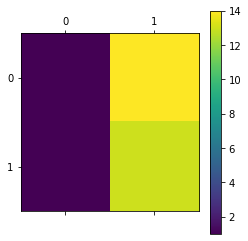

In [110]:
plt.matshow(conf_mat)
plt.colorbar()

Graph the results with seaborn:

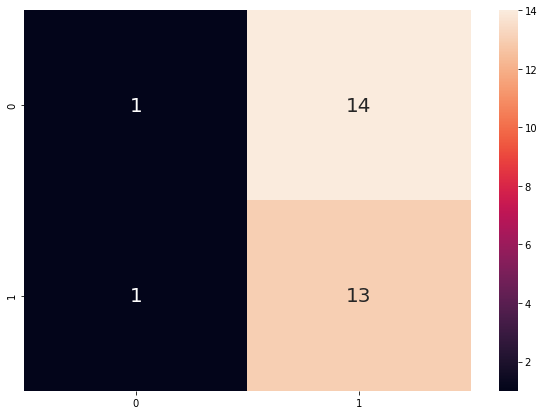

In [114]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})

Save this model so that it can be incorporated in app.py

In [144]:
models_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/models/'
filename = 'logistic_regression_model.sav'
pickle.dump(clf, open(models_path+filename, 'wb'))

'/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks'

In [146]:
print(pickle.format_version)

4.0


# Training a Model in TensorFlow

In [136]:
from tensorflow.keras import layers

NN = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
NN.add(layers.Dense(532, activation='relu'))
# Add another:
NN.add(layers.Dense(64, activation='relu'))
# Add an output layer with 1 output units:
NN.add(layers.Dense(1))

NN.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=NN.fit(X_train_rand, Y_train_rand, epochs=5, batch_size=32)

Epoch 1/5
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9305
Epoch 2/5
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 3/5
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 4/5
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9398
Epoch 5/5
17/17 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9398


In [137]:
NN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  2298772   
_________________________________________________________________
dense_10 (Dense)             multiple                  34112     
_________________________________________________________________
dense_11 (Dense)             multiple                  65        
Total params: 2,332,949
Trainable params: 2,332,949
Non-trainable params: 0
_________________________________________________________________


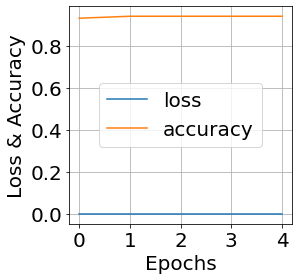

In [138]:
pd.DataFrame(history.history).plot(figsize=(4,4),fontsize=20)
plt.grid(True)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss & Accuracy',fontsize=20)
plt.legend(fontsize=20,loc='center')

In [139]:
NN.evaluate(X_test_rand, Y_test_rand)

1/1 [==============================] - 0s 831us/step - loss: 0.0000e+00 - accuracy: 0.5172


[0.0, 0.517241358757019]

In [140]:
Y_NNpredictions = NN.predict(X_test_rand)
Y_NNpredictions
#conf_mat=sklearn.metrics.confusion_matrix(Y_test_rand, Y_NNpredictions)
#conf_mat

array([[-3.3833568e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-8.0349140e+06],
       [-8.1788200e+06],
       [-3.4642182e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-4.3704192e+07],
       [-7.9674600e+05],
       [-5.7225250e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-2.6437570e+02],
       [-1.8994816e+07],
       [-8.9974890e+06],
       [-1.1147693e+07],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-5.8112854e+02],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-5.0386310e+06],
       [-8.1788200e+06],
       [-8.1788200e+06],
       [-7.4686900e+06],
       [-2.2064060e+07]], dtype=float32)

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})